# Tratamento de dados e identificação de outliers do dataset "Aluguel_csv", utilizando apenas PANDAS e MATPLOTLIB.

-----------------------------------------------------------------------------------------------------------------------------

## Sobre a base de dados:

### O referido dataset contém informações de imóveis localizados na cidade do Rio de Janeiro, com dados sobre:

* Tipo de imóvel: Apartamento, Casa, Casa de Condominio, Indústria, Terreno, Quitinete, Casa de Vila, entre outros.
* Bairro
* Número de quartos
* Vagas de Garagem
* Suítes
* Área útil
* Valor do aluguel do imóvel
* Valor do Condomínio
* IPTU

-----------------------------------------------------------------------------------------------------------------------------

#### Neste Notebook, levaremos em consideração apenas imóveis residenciais dos tipos:

* Quitinete
* Casa
* Apartamento
* Casa de Condomínio
* Casa de Vila

#### Os demais tipos de imóvel serão desconsiderados.

-----------------------------------------------------------------------------------------------------------------------------

#### PARTE I:

> Verificar todos os tipos de imóveis disponíveis no dataset;

> Selecionar todos os imóveis cujo tipo satisfaça a condição "ser imóvel residencial";

> Criar um novo dataset que contenha somente informações sobre imóveis residenciais.

-----------------------------------------------------------------------------------------------------------------------------

In [63]:
# Importação de bibliotecas:

import pandas as pd
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(15,8))

In [2]:
# Importação do dataset:

dados = pd.read_csv('data/aluguel.csv', sep = ';')
dados.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN


In [3]:
# Informações gerais sobre o dataset:

dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32960 entries, 0 to 32959
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Tipo        32960 non-null  object 
 1   Bairro      32960 non-null  object 
 2   Quartos     32960 non-null  int64  
 3   Vagas       32960 non-null  int64  
 4   Suites      32960 non-null  int64  
 5   Area        32960 non-null  int64  
 6   Valor       32943 non-null  float64
 7   Condominio  28867 non-null  float64
 8   IPTU        22723 non-null  float64
dtypes: float64(3), int64(4), object(2)
memory usage: 2.3+ MB


In [4]:
# Tipos de dados disponíveis no dataframe: formatando a apresentação

tipos_dados = pd.DataFrame(dados.dtypes, columns = ['Tipos de dados'])
tipos_dados.columns.name = 'Variáveis'
tipos_dados

Variáveis,Tipos de dados
Tipo,object
Bairro,object
Quartos,int64
Vagas,int64
Suites,int64
Area,int64
Valor,float64
Condominio,float64
IPTU,float64


In [5]:
# Criando uma variável para os tipos de imóvel disponíveis no dataset:

tipo_imovel = dados['Tipo']
tipo_imovel

0                      Quitinete
1                           Casa
2        Conjunto Comercial/Sala
3                    Apartamento
4                    Apartamento
                  ...           
32955                  Quitinete
32956                Apartamento
32957                Apartamento
32958                Apartamento
32959    Conjunto Comercial/Sala
Name: Tipo, Length: 32960, dtype: object

In [6]:
# Visualizando quais são todos os tipos diferentes de imóveis disponíveis no dataset:

tipo_imovel.drop_duplicates(inplace = True)
tipo_imovel

0                          Quitinete
1                               Casa
2            Conjunto Comercial/Sala
3                        Apartamento
7                 Casa de Condomínio
16                    Prédio Inteiro
17                              Flat
29                        Loja/Salão
80           Galpão/Depósito/Armazém
83                    Casa Comercial
117                     Casa de Vila
159                   Terreno Padrão
207                      Box/Garagem
347                             Loft
589      Loja Shopping/ Ct Comercial
2157                         Chácara
3354           Loteamento/Condomínio
4379                           Sítio
4721                   Pousada/Chalé
6983                          Studio
9687                           Hotel
23614                      Indústria
Name: Tipo, dtype: object

In [7]:
# Tipos de imóvel disponíveis no dataframe: formatando a apresentação.

tipo_imovel = pd.DataFrame(tipo_imovel)
tipo_imovel.columns.name = 'Id'
tipo_imovel

Id,Tipo
0,Quitinete
1,Casa
2,Conjunto Comercial/Sala
3,Apartamento
7,Casa de Condomínio
16,Prédio Inteiro
17,Flat
29,Loja/Salão
80,Galpão/Depósito/Armazém
83,Casa Comercial


In [8]:
# Quero alterar os índices. Quantos elementos tem 'tipo_imovel'?

tipo_imovel.shape

(22, 1)

In [9]:
# Alterando os índices:

tipo_imovel.index = range(22)
tipo_imovel

Id,Tipo
0,Quitinete
1,Casa
2,Conjunto Comercial/Sala
3,Apartamento
4,Casa de Condomínio
5,Prédio Inteiro
6,Flat
7,Loja/Salão
8,Galpão/Depósito/Armazém
9,Casa Comercial


In [10]:
# Escolha dos tipos de imóveis relevantes para este projeto, isto é, imóveis residenciais:

tipo_residencial = ['Quitinete', 'Casa', 'Apartamento', 'Casa de Condomínio', 'Casa de Vila']

In [11]:
# Selecionando, dentro do dataset original, quais são os imóveis que atendem ao requisito (tipo_residencial):

selecao = dados['Tipo'].isin(tipo_residencial)
selecao

# Entendendo o resultado: Todos os itens marcados como TRUE satisfazem a condição, ou seja, são imóveis residenciais.

0         True
1         True
2        False
3         True
4         True
         ...  
32955     True
32956     True
32957     True
32958     True
32959    False
Name: Tipo, Length: 32960, dtype: bool

In [12]:
# Criando um novo dataframe, somente com imóveis residenciais:

dados_residenciais = dados[selecao]
dados_residenciais

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
5,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
32953,Apartamento,Méier,2,0,0,70,900.0,490.0,48.0
32955,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0
32956,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
32957,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0


In [13]:
# Confirmando quais são os tipos de imóveis existentes no novo dataframe:

dados_residenciais['Tipo'].drop_duplicates()

0               Quitinete
1                    Casa
3             Apartamento
7      Casa de Condomínio
117          Casa de Vila
Name: Tipo, dtype: object

In [14]:
# Inserindo novos índices no novo dataset:

dados_residenciais.index = range(22580)
dados_residenciais

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
4,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
22575,Apartamento,Méier,2,0,0,70,900.0,490.0,48.0
22576,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0
22577,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
22578,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0


In [15]:
# Exportando o novo dataset:

dados_residenciais.to_csv('data/Aluguel_residencial.csv', sep = ';', index = False)

-----------------------------------------------------------------------------------------------------------------------------

#### PARTE II:

> Quantos são os imóveis classificados como tipo 'Apartamento'?

> Quantos são os imóveis do tipo 'Casa', 'Casa de condomínio', 'Casa de Vila'?

> Quantos são os imóveis com área entre 60 e 100m2, inclusive?

> Quantos são os imóveis que tenham, pelo menos, 4 quartos e aluguel menor que R$2000?

-----------------------------------------------------------------------------------------------------------------------------

In [16]:
# Seleção dos imóveis do tipo 'Apartamento':

selecao = dados_residenciais['Tipo'] == 'Apartamento'
q1 = dados_residenciais[selecao].shape
q1

(19532, 9)

In [17]:
# Seleção dos imóveis do tipo 'Casa', 'Casa de Condomínio', 'Casa de Vila':

selecao = (dados_residenciais['Tipo'] == 'Casa') | (dados_residenciais['Tipo'] == 'Casa de Condomínio') | (dados_residenciais['Tipo'] == 'Casa de Vila')
q2 = dados_residenciais[selecao].shape
q2

(2212, 9)

In [18]:
# Seleção dos imóveis com área entre 60 e 100m2, inclusive:

selecao = (dados_residenciais['Area'] >= 60) & (dados_residenciais['Area'] <= 100)
q3 = dados_residenciais[selecao].shape
q3

(8719, 9)

In [19]:
# Selecionar os imóveis que tenham, pelo menos, 4 quartos e aluguel menor que R$2000:

selecao = (dados_residenciais['Quartos'] >= 4) & (dados_residenciais['Valor'] < 2000)
q4 = dados_residenciais[selecao].shape
q4

(41, 9)

In [20]:
# Apresentação do resultado:

print(f'Existem {q1} imóveis do tipo Apartamento disponíveis.')
print(f'Existem {q2} imóveis dos tipos Casa, Casa de Condomínio ou Casa de Vila disponíveis.')
print(f'Existem {q3} imóveis com área entre 60 e 100 metros quadrados disponíveis.')
print(f'Existem {q4} imóveis com, pelo menos, 4 quartos e aluguel inferior a R$2000 disponíveis.')

Existem (19532, 9) imóveis do tipo Apartamento disponíveis.
Existem (2212, 9) imóveis dos tipos Casa, Casa de Condomínio ou Casa de Vila disponíveis.
Existem (8719, 9) imóveis com área entre 60 e 100 metros quadrados disponíveis.
Existem (41, 9) imóveis com, pelo menos, 4 quartos e aluguel inferior a R$2000 disponíveis.


-----------------------------------------------------------------------------------------------------------------------------

#### PARTE III:

* Tratamento de valores NaN:

> Registros sem informação do valor do aluguel do imóvel serão descartadas;

> Imóveis do tipo 'Apartamento' sem informação sobre o valor do condomínio serão descartadas;

> Imóveis do tipo 'Casa', cujas informações sobre o condomínio sejam NaN, terão seus valores registrados como zero;

> Informações de IPTU registradas como NaN terão seus valores indicados por zero.

-----------------------------------------------------------------------------------------------------------------------------

In [21]:
# Verificando quantos registros existem sem informação sobre o valor do aluguel:

aluguel_nan = dados_residenciais['Valor'].isnull()
dados_residenciais[aluguel_nan].shape[0]

9

In [22]:
# Excluindo os registros sem informação sobre o valor do aluguel:

dados_residenciais.dropna(subset = ['Valor'], inplace = True)

<ipython-input-22-521fb826127e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_residenciais.dropna(subset = ['Valor'], inplace = True)


In [23]:
# Verificando quantos registros existem sem informação sobre o valor do Condomínio:

condominio_nan = dados_residenciais['Condominio'].isnull()
dados_residenciais[condominio_nan].shape[0]

1813

In [24]:
# Dos registros sem condomínio verificados acima, quantos imóveis são do tipo 'Apartamento'?

condominio_nan_apt = (dados_residenciais['Tipo'] == 'Apartamento') & (dados_residenciais['Condominio'].isnull())
dados_residenciais[condominio_nan_apt].shape[0]

745

In [25]:
# Assim sendo, dos 1813 registros que têm o valor do condomínio registrado como NaN, 745 são apartamentos.
# A variável 'condominio_nan_apt' contém os registros que, ao mesmo tempo, não possuem info sobre o condomínio E são apts.
# Portanto, ~condominio_nan_apt conterá o restante dos registros sem informação de condomínio.

# Filtrando o dataset com as informações que permanecerão:

dados_residenciais = dados_residenciais[~condominio_nan_apt]

In [26]:
# Verificando se os dados foram excluídos:

dados_residenciais[condominio_nan].shape[0]

<ipython-input-26-bc52e34a2a69>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dados_residenciais[condominio_nan].shape[0]


1068

In [27]:
# Verificando se existem outros dados NaN além dos relevantes para este projeto:

dados_residenciais.info()

# Os valores de condomínio NaN restantes são referentes a casas.
# Os valores de IPTU NaN são irrelevantes para o projeto.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21826 entries, 0 to 22579
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Tipo        21826 non-null  object 
 1   Bairro      21826 non-null  object 
 2   Quartos     21826 non-null  int64  
 3   Vagas       21826 non-null  int64  
 4   Suites      21826 non-null  int64  
 5   Area        21826 non-null  int64  
 6   Valor       21826 non-null  float64
 7   Condominio  20758 non-null  float64
 8   IPTU        15685 non-null  float64
dtypes: float64(3), int64(4), object(2)
memory usage: 1.7+ MB


In [28]:
# Preenchendo com zeros os registros NaN restantes:

dados_residenciais = dados_residenciais.fillna({'Condominio': 0, 'IPTU': 0})

In [29]:
# Verificando noramente as informações:

dados_residenciais.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21826 entries, 0 to 22579
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Tipo        21826 non-null  object 
 1   Bairro      21826 non-null  object 
 2   Quartos     21826 non-null  int64  
 3   Vagas       21826 non-null  int64  
 4   Suites      21826 non-null  int64  
 5   Area        21826 non-null  int64  
 6   Valor       21826 non-null  float64
 7   Condominio  21826 non-null  float64
 8   IPTU        21826 non-null  float64
dtypes: float64(3), int64(4), object(2)
memory usage: 1.7+ MB


In [30]:
# Salvando as alterações do dataset: sem informações NaN:

dados_new = dados_residenciais.to_csv('data/Aluguel_new.csv', sep = ';', index = False)

-----------------------------------------------------------------------------------------------------------------------------

#### PARTE IV:

* Criação de novas variáveis no dataset:

> Valor Bruto: Todas as despesas a serem pagas mensalmente, isto é: Valor, Condomínio e IPTU.

> Valor por m2: Valor do aluguel por m2;

> Classificar como 'Casa' os tipos: Casa, Casa de Condominio e Casa de Vila.

-----------------------------------------------------------------------------------------------------------------------------

In [31]:
dados_new = pd.read_csv('data/Aluguel_new.csv', sep = ';')

In [32]:
dados_new.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0
4,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0


In [33]:
# Criando a nova variável (coluna) 'Valor_Bruto':

dados_new['Valor_Bruto'] = dados_new['Valor'] + dados_new['Condominio'] + dados_new['IPTU']
dados_new.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor_Bruto
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,2260.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,7000.0
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,1210.0
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,1030.0
4,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,1618.0


In [34]:
# Criando a nova variável 'Valor_m2':

dados_new['Valor_m2'] = (dados_new['Valor'] / dados_new['Area']).round(2)
dados_new.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor_Bruto,Valor_m2
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,2260.0,42.50
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,7000.0,70.00
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,1210.0,53.33
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,1030.0,16.67
4,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,1618.0,26.00


In [35]:
# Classificar como 'Casa' os tipos: Casa, Casa de Condomínio e Casa de Vila:

casa = ['Casa', 'Casa de Condomínio', 'Casa de Vila']

dados_new['Tipos_casa'] = dados_new['Tipo'].apply(lambda x: 'Casa' if x in casa else 'Apartamento')

In [36]:
dados_new.head(15)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor_Bruto,Valor_m2,Tipos_casa
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,2260.0,42.50,Apartamento
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,7000.0,70.00,Casa
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,1210.0,53.33,Apartamento
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,1030.0,16.67,Apartamento
4,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,1618.0,26.00,Apartamento
5,Casa de Condomínio,Barra da Tijuca,5,4,5,750,22000.0,0.0,0.0,22000.0,29.33,Casa
6,Casa de Condomínio,Ramos,2,2,0,65,1000.0,0.0,0.0,1000.0,15.38,Casa
7,Apartamento,Grajaú,2,1,0,70,1500.0,642.0,74.0,2216.0,21.43,Apartamento
8,Apartamento,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0,1969.0,16.67,Apartamento
9,Apartamento,Copacabana,1,0,1,40,2000.0,561.0,50.0,2611.0,50.00,Apartamento


In [37]:
# Levando-se em consideração a quantidade de registros cujos valores de condomínio e IPTU são iguais a zero, decidiu-se
# eliminar a variável 'Valor_Bruto':

dados_new.drop(['Valor_Bruto'], axis = 1, inplace = True)

In [38]:
dados_new.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor_m2,Tipos_casa
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,42.50,Apartamento
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,70.00,Casa
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,53.33,Apartamento
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,16.67,Apartamento
4,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,26.00,Apartamento


In [39]:
dados_new = dados_new.to_csv('data/Aluguel_new.csv', sep = ';', index = False)

-----------------------------------------------------------------------------------------------------------------------------

#### PARTE V:

* Identificando e removendo Outliers.

-----------------------------------------------------------------------------------------------------------------------------

In [41]:
dados_new = pd.read_csv('data/Aluguel_new.csv', sep = ';')

In [45]:
# Investigação inicial sobre possíveis outliers:

dados_new['Valor'].describe().round(2)

count      21826.00
mean        5046.17
std        32988.54
min          100.00
25%         1600.00
50%         2700.00
75%         5500.00
max      4500000.00
Name: Valor, dtype: float64

####

##### Considerações sobre os valores acima:

> O desvio padrão é elevado;

> O valor máximo (4.500.000,00 reais), levando-se em consideração valores referentes a aluguéis, é discrepante.

####

#### Criando faixas de valor:

> Imóveis com valor de aluguel entre: 0 e 2000 reais;

> Imóveis com valor de aluguel entre: 2000 e 5000 reais;

> Imóveis com valor de aluguel entre: 5000 e 8000 reais;

> Imóveis com valor de aluguel entre: 8000 e 10000 reais;

> Imóveis com valor de aluguel entre 10000 e 30000 reais;

> Imóveis com valor de aluguel entre 30000 e 50000 reais;

> Imóveis com valor de aluguel maiores que 50mil reais;

In [57]:
classes = [0, 2000, 5000, 8000, 10000, 30000, 50000, 99999999]

In [54]:
# Categorizando:

alugueis = pd.cut(dados_new['Valor'], classes)
alugueis

0           (0, 2000]
1        (5000, 8000]
2           (0, 2000]
3           (0, 2000]
4           (0, 2000]
             ...     
21821       (0, 2000]
21822       (0, 2000]
21823       (0, 2000]
21824       (0, 2000]
21825    (2000, 5000]
Name: Valor, Length: 21826, dtype: category
Categories (7, interval[int64]): [(0, 2000] < (2000, 5000] < (5000, 8000] < (8000, 10000] < (10000, 30000] < (30000, 50000] < (50000, 99999999]]

In [55]:
# Contagem das categorias:

pd.value_counts(alugueis)

(0, 2000]            8237
(2000, 5000]         7967
(5000, 8000]         2492
(10000, 30000]       2053
(8000, 10000]         956
(30000, 50000]        102
(50000, 99999999]      19
Name: Valor, dtype: int64

In [56]:
# Formatando o reultado:

labels = ['Aluguel entre: 0 e 2000 reais', 'Aluguel entre: 2000 e 5000 reais', 'Aluguel entre: 5000 e 8000 reais',
         'Aluguel entre: 8000 e 10 mil reais', 'Aluguel entre: 10 mil e 30 mil reais', 'Aluguel entre: 30 mil e 50 mil reais',
         'Aluguel acima de 50 mil reais']

alugueis = pd.cut(dados_new['Valor'], classes, labels = labels, include_lowest = True)
pd.value_counts(alugueis)

Aluguel entre: 0 e 2000 reais           8237
Aluguel entre: 2000 e 5000 reais        7967
Aluguel entre: 5000 e 8000 reais        2492
Aluguel entre: 10 mil e 30 mil reais    2053
Aluguel entre: 8000 e 10 mil reais       956
Aluguel entre: 30 mil e 50 mil reais     102
Aluguel acima de 50 mil reais             19
Name: Valor, dtype: int64

<AxesSubplot:>

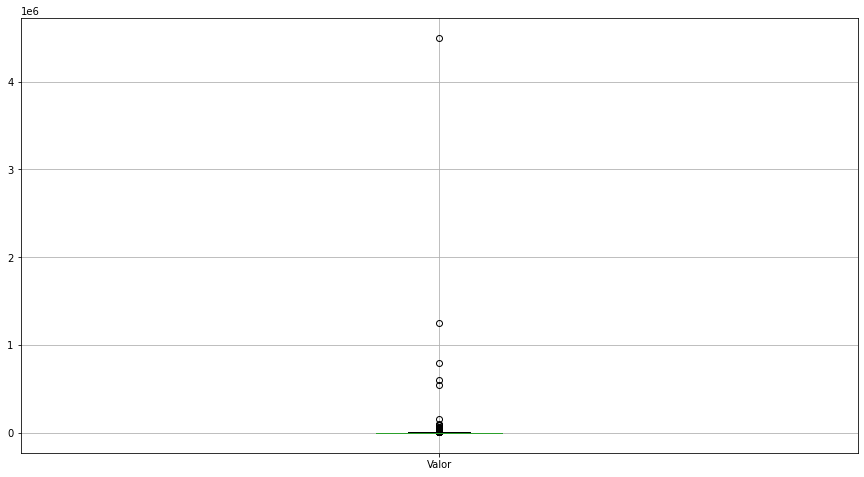

In [64]:
# Investigação sobre outliers utilizando boxplot:

dados_new.boxplot(['Valor'])

#### Nota-se, superficialmente, que há valores de aluguel muito acima da média em nossa base de dados, como já verificado em análise anterior.

In [62]:
# Mostrando dados com valor de aluguél elevado, ou seja, possivelmente distorções:

dados_new[dados_new['Valor']>=500000]

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor_m2,Tipos_casa
7629,Apartamento,Barra da Tijuca,1,1,0,65,600000.0,980.0,120.0,9230.77,Apartamento
10636,Casa de Condomínio,Freguesia (Jacarepaguá),4,2,3,163,800000.0,900.0,0.0,4907.98,Casa
12661,Apartamento,Freguesia (Jacarepaguá),2,2,1,150,550000.0,850.0,150.0,3666.67,Apartamento
13846,Apartamento,Recreio dos Bandeirantes,3,2,1,167,1250000.0,1186.0,320.0,7485.03,Apartamento
15520,Apartamento,Botafogo,4,1,1,300,4500000.0,1100.0,0.0,15000.00,Apartamento


### Investigação sobre outliers utilizando quartis:

#### Quartis:

#### Num conjunto de dados, podemos dividi-lo em quartis, onde:

* Q1: Primeiro quartil. 25% dos dados se encontram abaixo dessa marca. 75% acima.
* Q3: Terceiro quartil. 75% dos dados se encontram abaixo dessa marca. 25% acima.
* IIQ: Intervalo inter-quartis. Diferença entre o Q3 e o Q1.

#### Valores que se encontram abaixo da marca Q1 - 1.5*IIQ são outliers.
#### Valores que se encontram acima da marca Q3 + 1.5*IIQ são outliers.

![Figura Quartis](compressed_box-plot.png)

In [72]:
# Calculando o Q1, Q3 e IIQ:

valor = dados_new['Valor']
Q1 = valor.quantile(.25)
Q3 = valor.quantile(.75)
IIQ = Q3 - Q1

In [73]:
# Calculando o limite inferior e superior:

lim_inferior = Q1 - (1.5*IIQ)
lim_superior = Q3 + (1.5*IIQ)

In [74]:
# Fazendo a seleção dos dados que estão dentro dos limites inferior e superior:

selecao = (valor >= lim_inferior) & (valor <= lim_superior)

# Criação de uma variável auxiliar para não modificar o dataset, aplicando a selecao:

dados_limites= dados_new[selecao]

<AxesSubplot:>

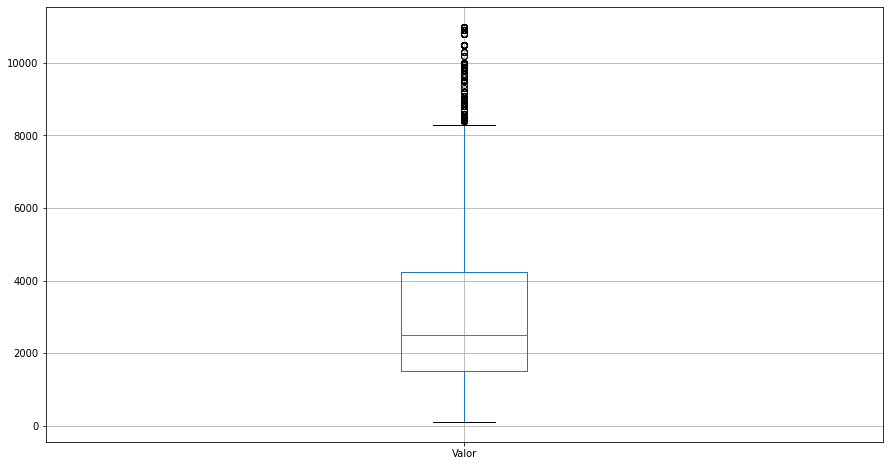

In [75]:
# Refazendo o boxplot, mas agora sem as discrepâncias:

dados_limites.boxplot(['Valor'])

<AxesSubplot:title={'center':'Valor'}, xlabel='[Tipo]'>

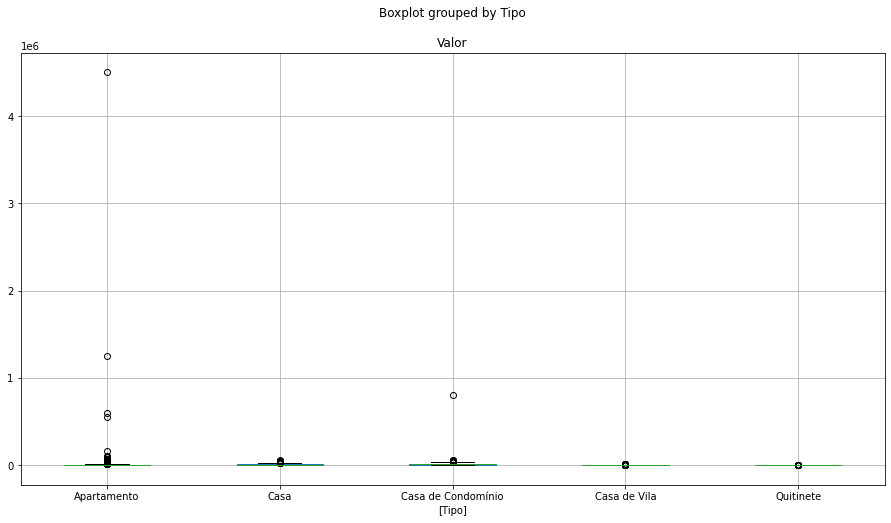

In [76]:
# Construindo um boxplot por tipo:

dados_new.boxplot(['Valor'], by = ['Tipo'])

In [77]:
# Dividindo em grupos: Criando grupos de 'Tipos', acompanhados de seus valores.

grupo_tipo = dados_new.groupby('Tipo')['Valor']
grupo_tipo.groups

{'Apartamento': [2, 3, 4, 7, 8, 9, 11, 13, 14, 15, 17, 18, 19, 20, 21, 23, 24, 25, 26, 27, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 55, 56, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 72, 73, 74, 75, 76, 77, 79, 80, 82, 83, 84, 85, 87, 88, 89, 90, 91, 92, 93, 94, 95, 97, 98, 99, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, ...], 'Casa': [1, 22, 54, 57, 96, 100, 144, 160, 180, 238, 250, 253, 264, 286, 310, 316, 334, 339, 357, 378, 385, 399, 424, 434, 474, 475, 481, 511, 542, 543, 567, 571, 572, 618, 621, 630, 635, 636, 660, 676, 700, 721, 724, 760, 771, 780, 856, 873, 937, 982, 1029, 1036, 1118, 1123, 1125, 1157, 1178, 1249, 1256, 1316, 1335, 1350, 1371, 1412, 1426, 1430, 1440, 1445, 1472, 1475, 1488, 1586, 1604, 1656, 1662, 1666, 1671, 1684, 1709, 1717, 1762, 1810, 1835, 1875, 1905, 1933, 1942, 1960, 2019, 2039, 2056, 2075, 2101, 2107, 2108, 2133, 2170, 2201, 2204, 2211, ...], 'Casa 

In [78]:
# Criando os dados estatísticos para cada tipo de imóvel:

Q1 = grupo_tipo.quantile(.25)
Q3 = grupo_tipo.quantile(.75)
IIQ = Q3 - Q1
lim_inferior = Q1 - (1.5*IIQ)
lim_superior = Q3 + (1.5*IIQ)

In [79]:
# Verificando o limite superior de cada Tipo de imóvel:

lim_superior

Tipo
Apartamento            9950.0
Casa                  22850.0
Casa de Condomínio    32125.0
Casa de Vila           3375.0
Quitinete              2400.0
Name: Valor, dtype: float64

#### Interpretando os dados acima:

* Para o tipo 'Apartamento', os valores de aluguel que estiverem acima de 9950 reais serão considerados outliers.
* Para o tipo 'Casa', os valores de aluguel que estiverem acima de 22850 reais serão considerados outliers.
* Para o tipo 'Casa de Condominio', os valores de aluguel que estiverem acima de 32125 reais serão considerados outliers.
* Para o tipo 'Casa de Vila', os valores de aluguel que estiverem acima de 3375 reais serão considerados outliers.
* Para o tipo 'Quitinete', os valores de aluguel que estiverem acima de 2400 reais serão considerados outliers.

In [80]:
# Construindo um novo dataframe, livre de outliers:

dados_limites = pd.DataFrame()
for typo in grupo_tipo.groups.keys():
    eh_tipo = dados_new['Tipo'] == typo
    eh_dentro_limite = (dados_new['Valor'] >= lim_inferior[typo]) & (dados_new['Valor'] <= lim_superior[typo])
    selecao = eh_tipo & eh_dentro_limite
    dados_selecao = dados_new[selecao]
    dados_limites = pd.concat([dados_limites, dados_selecao])

<AxesSubplot:title={'center':'Valor'}, xlabel='[Tipo]'>

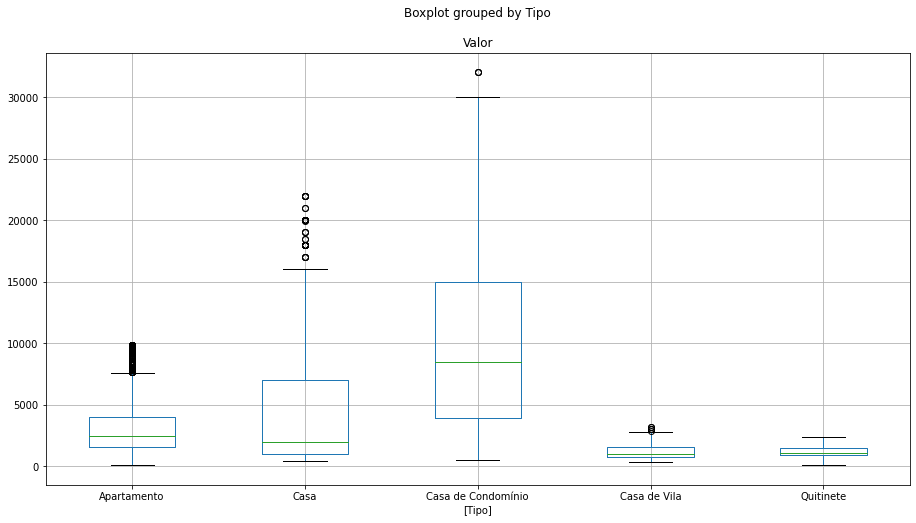

In [81]:
# Construindo um boxplot do novo dataframe:

dados_limites.boxplot(['Valor'], by = ['Tipo'])

In [83]:
# Salvando o dataframe novo, livre de outliers:

dados_limites.to_csv('data/aluguel_new.csv', sep = ';', index = False)